# Empalme con la clase anterior.

# Deteccion de anomalias: Anomaly detection.
Tambien se le llama **outlier detection** (deteccion de muestras "raras").

## Aplicaciones:
* Fraude. Fraude bancario, tarjetas de credito, seguros.
* Defectos de fabrica (manufactura). Danhos industriales.
* Monitoreo de sistemas de salud, diagnosticos medicos.
* Prevencion de crimen. Vigilancia con videos. Deteccion de intrusos.

Existen varios metodos para la deteccion de anomalias:

* Estadistico (el que veremos en esta clase)
* Proximity-based (basados en proximidad)
* Density-based (basados en densidad)
* clustering-based techniques.

### Metodo estadistico para la deteccion de anomalias.
* El caso de una sola variable (one-dimensional)
* El caso de multidimensional normal distribution.

Por ahora solo estudiamos el caso de la distribucion normal en una sola variable.

La distribucion normal en una sola variable, tambien se conoce como Gaussiana sobre $x$ esta dada por

$$p(x; \mu, \sigma^2) = \mathcal{N}(\mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \mathrm{e}^{- \frac{(x - \mu)^2}{2 \sigma^2}} $$

Donde $\mu, \sigma \in \mathbb{R}$,

$$ \mu= \frac1m \sum_{i=1}^m x^{(i)} $$
es la media (mean) y
$$\sigma^2 = \frac1m \sum_{i=1}^m (x^{(i)} - \mu)^2 $$
es la varianza de los datos (ojo que para que no haya sesgo en la varianza se debe dividir por $m-1$ pero eso aca no nos afecta.
Aca $p$ es probabilidad.

$$p( a \le x \le b ) = \int_a^b p(x; \mu, \sigma^2) dx $$

### Interpretacion. Ver grafica.



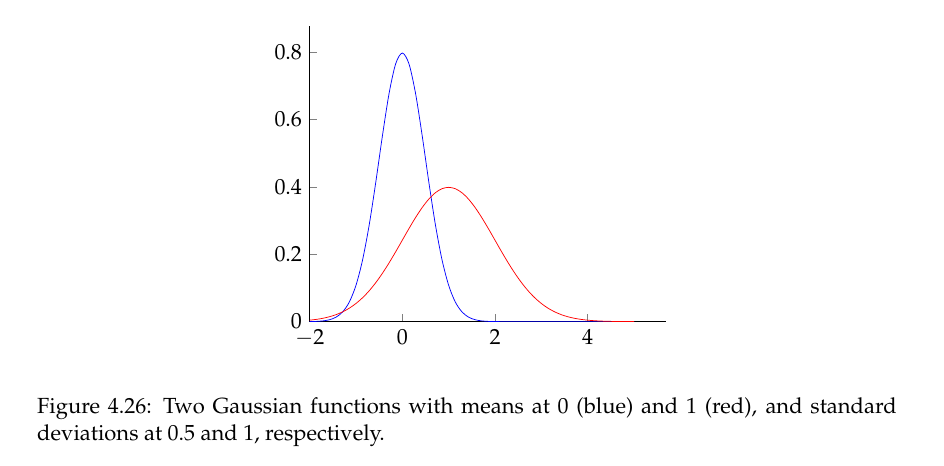

En donde esta la deteccion de anomalias.

* Toca fijar un umbral (threshold) $\epsilon>0$.
* Las muestras anomalas son aqueyas para las cuales

$$p(x; \mu, \sigma^2) < \epsilon $$

Que pasa si $x \in \mathbb{R}^n$.
Tambien podemos calcular la media y varianza con las formulas.

$$ \mu= \frac1m \sum_{i=1}^m x^{(i)} $$

$$\sigma_j^2 = \frac1m \sum_{i=1}^m \| x_j^{(i)} - \mu_j  \|^2 $$

Como calculamos la densidad de probabilidad.

Inicialmente asumimos que las muestras son independientes (estadisticamente). No existe correlacion entre ellas.

En este caso asumimos que en cada variable hay una distribucion Gaussiana y la probabilidad de la variable sobre todas sus componentes (independienes) es el producto de las probabilidades sobre estas componentes.


$$p(x^{(i)}; \mu, \sigma^2) = \prod_{j=1}^n
p(x_j^{(i)}; \mu_j, \sigma_j^2) = \frac{1}{\sqrt{(2 \pi)^n \prod_{j=1}^n \sigma_j^2}} \exp
\left ( -\sum_{j=1}^n \frac{( x_j^{(i)} - \mu_j)^2}{2 \sigma_j^2} \right )  \tag{0} $$

## Distribucion normal multivariada (caso general)
[La distribucion normal multivariada](https://en.wikipedia.org/wiki/Multivariate_normal_distribution)
se describe con la ecuacion

$$p(x; \mu, \Sigma) = \mathcal{N}(\mu, \Sigma) =
\frac{1}{\sqrt{(2 \pi)^n |\det (\Sigma)}|}
\exp \left (-\frac12 (x - \mu)^T \Sigma^{-1} (x - \mu)  \right ) \tag{1} $$

Donde

$$\mu = \frac1m \sum_{j=1}^m x^{(j)} $$

$$\Sigma = \frac1m ( X - \mu)^T ( X - \mu). $$
La matriz $\Sigma$ se llama matriz de **covarianza**.
La matriz $\Sigma^{-1}$ se llama matriz de **concentracion**.

Interpreamos la ecuacion (1) en particular $\Sigma$.
Pensemos en el exponente (que es una forma cuadratica
$u^T X u$), donde $X$ es positiva definida. Estas formas cuadraticas con como paraboloides. Ahora la distribucion de probabilidad $p(x; \mu, \Sigma)$ es una **campana de Gauss** en $n$ dimensiones. Para poder interpretar pensamos en el espacio de $3$ dimensiones donde la matriz de covarianza es $2 \times 2$.   

La grafica que incluyo abajo explica el problema.

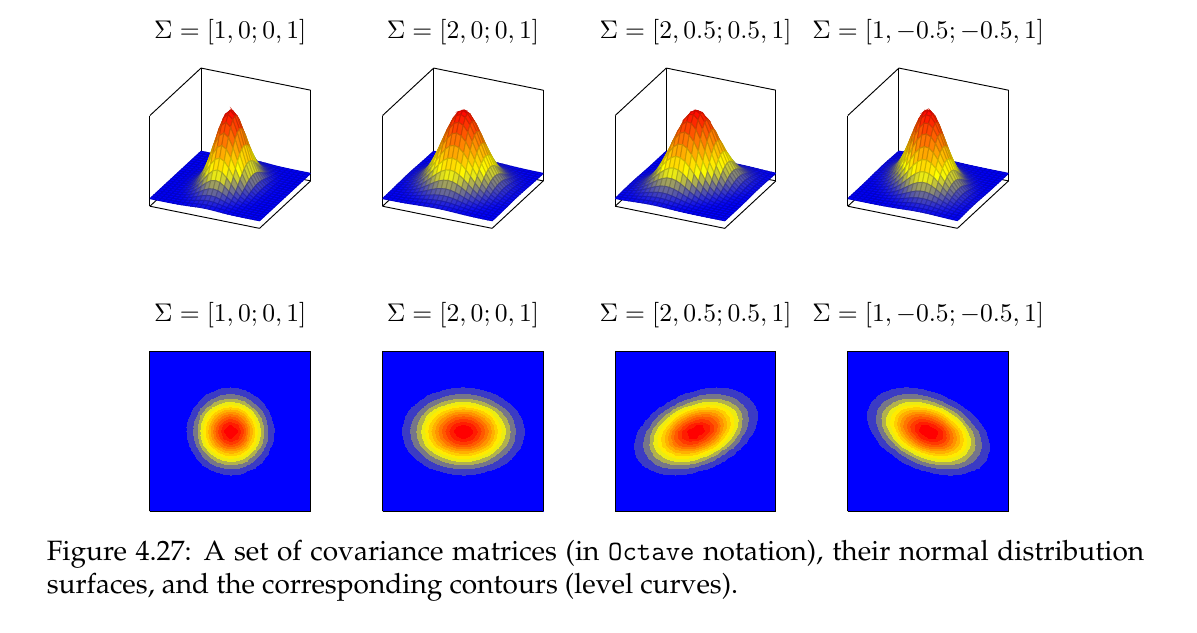

Las curvas de nivel de las campanas Gaussianas siguen la ecuacion

$$-\frac12 (x - \mu)^T \Sigma^{-1}(x-\mu) = \text{constante} $$
Esas curvas son cuadraticas y como $\Sigma$ es positiva definida entonces son elipses (circulo caso especial cuando los semiejes (autovalores) son iguales $a=b=r=\lambda$)



Les dije que si $\Sigma$ era diagonal (esto ocurre cuando los eventos son estadisticamente independientes) entonces la ecuacion (1) se reduce a la ecuacion (0).

Veamos por que

$$\Sigma =
\begin{pmatrix}
\sigma_1^2 & 0 & \cdots & \cdots & \cdots & 0 \\
0 & \sigma_2^2 & \ddots & & &  \vdots  \\
\vdots & \ddots & \sigma_3^2 & \ddots &  & \vdots  \\
\vdots & &  \ddots  & \ddots & \ddots  & \vdots  \\
\vdots & & & & \ddots &  0  \\
0 & \cdots & \cdots & \cdots & \cdots & \sigma_n^2
\end{pmatrix}
$$

Vemos que los elementos de la diagonal son $\sigma_i^2$ son varianzas a lo largo de cada una de las dimensiones.

Tenemos que
$$\Sigma^{-1} =
\begin{pmatrix}
\sigma_1^{-2} & 0 & \cdots & \cdots & \cdots & 0 \\
0 & \sigma_2^{-2} & \ddots & & &  \vdots  \\
\vdots & \ddots & \sigma_3^{-2} & \ddots &  & \vdots  \\
\vdots & &  \ddots  & \ddots & \ddots  & \vdots  \\
\vdots & & & & \ddots &  0  \\
0 & \cdots & \cdots & \cdots & \cdots & \sigma_n^{-2}
\end{pmatrix}
$$

Con esto evaluamos la ecuacion (1)

$$\det \Sigma = \prod_{j=1}^n \sigma_j^2 \tag{2} $$

Nos queda la triple multiplicacion del exponente

$$-\frac12 (x^{(i)} - \mu)^T \Sigma^{-1} (x^{(i)}-\mu)= -\frac12 \sum_{j=1}^n \frac{(x_j^{(i)} - \mu_j)^2}{\sigma_j^2} \tag{3}$$

Las ecuacion (2) y (3) insertadas en la ecuacion (1) producen la ecuacion (0).


De nuevo formulamos la pregunta: Donde esta la deteccion de anomalias.  

De igual forma que hicimos en distribucion univariadas, lo hacemos con esta distribucion multivaridada.

Se elije un umbral $\epsilon >0$ y se detectan las muestras **anomalas** como aqueyas que satisfacen la ecuacion

$$p(x, \mu, \Sigma) < \epsilon $$

El algoritmo seria: (asumimos independencia estadistica en las dimensiones)

Asuma que ya se decicio quien es $\epsilon$.
1. Seleccione las muestras que se quieren probar (por ejemplo tornillos). $x^{(i)}$, $i=1,2, \cdots, m$.
Mejor dicho (data acquisition). Tome los datos.

2. Calcule $\mu_1, \mu_2, \cdots, \mu_n$
y asi mismo $\sigma_1^2, \sigma_2^2, \cdots, \sigma_n^2$
usando

$$\mu_i = \frac1m \sum_{j=1}^m x_i^{(j)} $$
$$\sigma_i^2 = \frac1m \sum_{j=1}^m (x_i^{(j)} - \mu_i)^2$$

3. Calculamos la probabilidad multivariada

$$p(x) = \prod_{i=1}^n p(x_i ; \mu_i, \sigma_i^2)
= \prod_{i=1}^n \frac{1}{\sqrt{2 \pi \sigma_j^2}}
\exp \left ( -\sum_{i=1}^n \frac{(x_i-\mu_i)^2}{2 \sigma_i^2} \right )
$$

4. Verifique cuales muestran satisfacen el criterio
$$p(x) < \epsilon $$


## Como se calcula el umbral $\epsilon$?

* Conocimiento de sus datos. (experiencia)
* Usar aprendizaje supervisado. Por decir algo
ya se conocen (en un lote) las muestras anomalas, entonces se etiquetan. Por decir algo $y^{(i)}=1$
para muestra anomala y $y^{(i)}=0$ para muestra normal.
Con esto se puede estimar el tipo de error que se tiene.
Se pueden usar metricas como la $F1$ u otras metricas basadas en la matriz de confusion para determinar un valor de $\epsilon$.

## Y que? si la distribucion de los datos no es normal.
Algunas distribuciones como

* Exponencial
* Poisson
* log normal
no siguen el formato de Gaussianas. Entonces lo que se podria hacer es transformarlas de forma que se acerquen a Gaussianas.

Hay mapeos (cambio de variables) que hacen este tipo de cosas. Por ejemplo

* $$x \mapsto \log(x + c) $$
* $$x \mapsto \sqrt{x} $$

coupled (acopladas)
decouple (desacoplar), independientes estadisticamente. La matriz de covarianza se convierte en diagonal y los computos son mucho mas faciles.

# Sistemas de Recomendacion:
Estos sistemas son de los mas productivo en la economia de ventas. En 2021 el 80% (mas o menos) de gente que miraba una pelicula lo hacia por recomendaciones del mismo Netflix.

Estos sistemas son semi-supervisados.

Ejemplos (aplicaciones)

* Seleccionar canciones en Spotify
* Mostrar avisos en facebook, gmail, etc.
* Amazon (libros, peliculas, AWS)
* Netflix.
* y muchos mas.

Vamos a estudiar dos casos:

1. Recomdaciones basadas en contenido
El contenido se conoce plenamente. Que es contenido?
* romance
* horror
* thriller
* comedia
2. Collaborative filtering (filtrado colaborativo)
No se conoce el contenido.

Antes de terminar incluyo una grafica que nos va a guiar en la proxima clase.




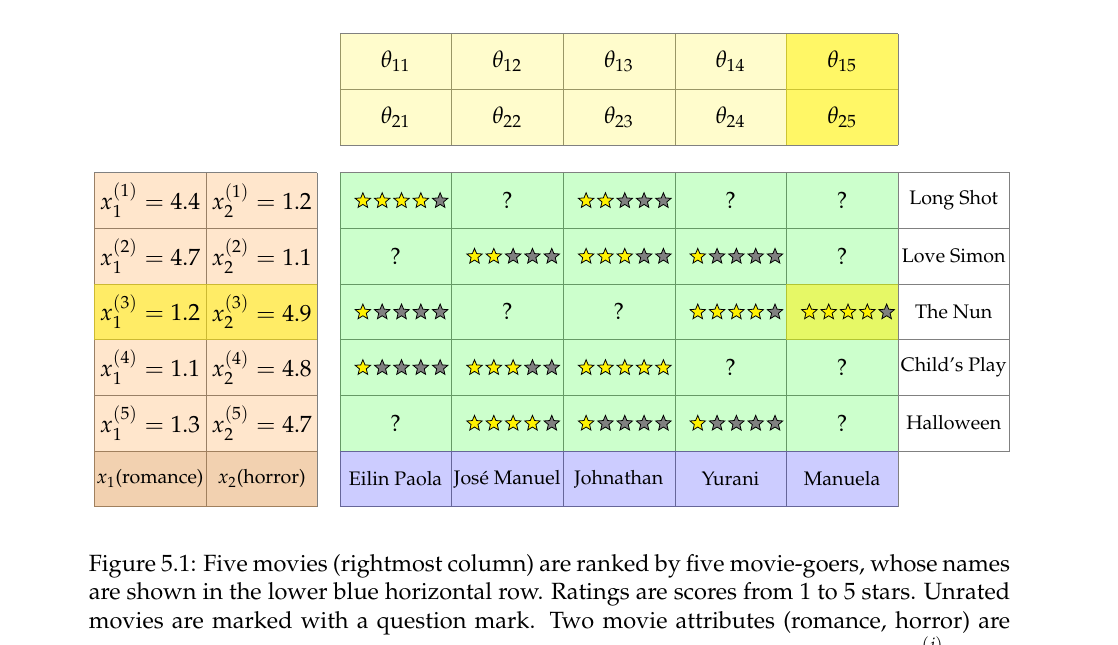